Click on Runtime and choose run all

# Collapse this panel to view dashboard



In [1]:
# Google Drive interface (Only needed in local Colab enviroment)
#"""
import pandas
# Mount Google Drive 
from google.colab import drive 
drive.mount('/content/drive')
# Change working directory to Capstone repository
%cd /content/drive/MyDrive/GitHub/Capstone
# List repository files for verification
%ls -a
# Load CSV dataset as DataFrame (df)
df = pandas.read_csv('/content/drive/MyDrive/GitHub/Capstone/diabetes.csv')
# Print DataFrame
df
#"""

Mounted at /content/drive
/content/drive/MyDrive/GitHub/Capstone
CapstoneProject.ipynb  diabetes.csv  .git/  README.MD  requirements.txt


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


 Install Colab environment dependencies

In [2]:
#"""
# Install jupyter-dash library
!pip install jupyter-dash
!pip install dash-bootstrap-components
#"""


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 9.7 MB/s 
     |████████████████████████████████| 357 kB 70.5 MB/s 
     |████████████████████████████████| 1.6 MB 46.7 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=008a20b84cf7d99451e085e5fdb530e6ff0a8a5beb5e636621a2cc89dc6337fa
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 6.6 MB/s 


 Install/Import the libraries needed to run the code.

In [3]:
# Import ML libraries
import pandas as pd             # data manipulation
import numpy as np              # high-level mathematics
import matplotlib.pyplot as plt # plotting

# For training model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report, f1_score
# For evaluating attribute significance in ML model
import statsmodels.api as sm
import statsmodels.formula.api as smf
# For visual dashboard
from jupyter_dash import JupyterDash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import plotly.express as px
import io, base64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`


 Load csv from GitHub

In [4]:
# Load CSV dataset as DataFrame (df)
df = pd.read_csv('https://raw.githubusercontent.com/machochocolate/CapstoneGH/master/diabetes.csv')
# Print DataFrame
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


 Format dataframe as df -> add Age_Group, create df_group

In [5]:
# Create age groupings by 10s value in DataFrame
df['Age_Group']=np.floor(df['Age']/10)*10
df['Age_Group_Plot'] = df['Age_Group'].astype(int).astype(str) + "s"
# Print DataFrame
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Group,Age_Group_Plot
0,6,148,72,35,0,33.6,0.627,50,1,50.0,50s
1,1,85,66,29,0,26.6,0.351,31,0,30.0,30s
2,8,183,64,0,0,23.3,0.672,32,1,30.0,30s
3,1,89,66,23,94,28.1,0.167,21,0,20.0,20s
4,0,137,40,35,168,43.1,2.288,33,1,30.0,30s
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,60.0,60s
764,2,122,70,27,0,36.8,0.340,27,0,20.0,20s
765,5,121,72,23,112,26.2,0.245,30,0,30.0,30s
766,1,126,60,0,0,30.1,0.349,47,1,40.0,40s


In [6]:
# Create DataFrame by Age_Group, show Outcome and total count + percentage
df_group = df.groupby('Age_Group_Plot', as_index=False).agg(Diabetes_Count=("Outcome", "sum"), Total_Count=("Outcome","count"))
df_group['Pct'] = df_group['Diabetes_Count'] / df_group['Total_Count']
# Print DataFrame
df_group

,Age_Group_Plot,Diabetes_Count,Total_Count,Pct
0,20s,84,396,0.212121
1,30s,76,165,0.460606
2,40s,65,118,0.550847
3,50s,34,57,0.596491
4,60s,8,29,0.275862
5,70s,1,2,0.500000
6,80s,0,1,0.000000


 Create data visualizations

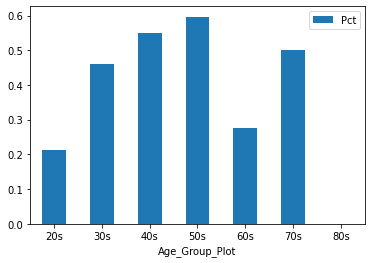

In [7]:
# Create visualization #1 bar graph plot by Age_Group
ax = df_group.plot.bar(x='Age_Group_Plot', y='Pct', rot=0)

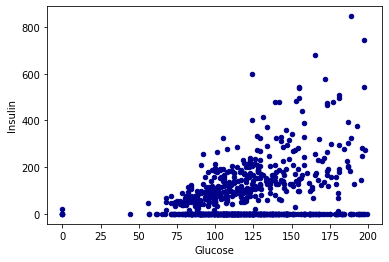

In [8]:
# Create visualization #2 Scatterplot Glucose vs Insulin
#ax2 = df.plot.scatter(x='Glucose', y='BloodPressure', c='DarkBlue')
#ax2 = df.plot.scatter(x='BloodPressure', y='SkinThickness', c='DarkBlue')
ax2 = df.plot.scatter(x='Glucose', y='Insulin', c='DarkBlue')

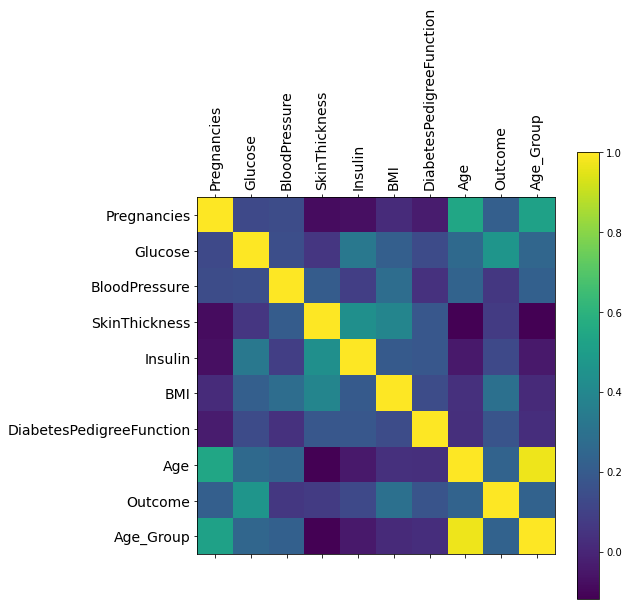

In [9]:
# Create visualization 3 confusion matrix of independent attributes
df_corr = df.drop(['Outcome','Age_Group_Plot'], axis=1)
f = plt.figure(figsize=(8, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
plt.show()

 Prepare data for modeling

In [10]:
# Convert Age_Group to onehot encoding to feed the logistic regression model
age_onehot = pd.get_dummies(df.Age_Group_Plot, prefix='Age')
age_onehot

,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80s
0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
763,0,0,0,0,1,0,0
764,1,0,0,0,0,0,0
765,0,1,0,0,0,0,0
766,0,0,1,0,0,0,0


In [11]:
# Integer-location based indexing with the inedpendent attributes
X = df.iloc[:, [0,1,2,3,4,5,6]]
X = pd.concat([X,age_onehot],axis=1)
y = df.Outcome
# Print index
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80s
0,6,148,72,35,0,33.6,0.627,0,0,0,1,0,0,0
1,1,85,66,29,0,26.6,0.351,0,1,0,0,0,0,0
2,8,183,64,0,0,23.3,0.672,0,1,0,0,0,0,0
3,1,89,66,23,94,28.1,0.167,1,0,0,0,0,0,0
4,0,137,40,35,168,43.1,2.288,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,0,0,0,0,1,0,0
764,2,122,70,27,0,36.8,0.340,1,0,0,0,0,0,0
765,5,121,72,23,112,26.2,0.245,0,1,0,0,0,0,0
766,1,126,60,0,0,30.1,0.349,0,0,1,0,0,0,0


In [12]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

 Train model with prepared data

In [13]:
#train model
model_skl_1 = LogisticRegression(max_iter=1000).fit(X_train, y_train) #version with everything

#apply model to test set
y_pred_1 = model_skl_1.predict(X_test)
# Print linear regression accuracy
print('Model accuracy:' + str(accuracy_score(y_test,y_pred_1)*100))

Model accuracy:76.37795275590551


In [14]:
#tried random forest, basically same accuracy, but less interpretability

#train model
model_skl_2 = RandomForestClassifier(max_depth=7, random_state=0).fit(X_train, y_train)

#apply model to test set
y_pred_2 = model_skl_2.predict(X_test)
# Print random forest accuracy
print('Model accuracy:' + str(accuracy_score(y_test,y_pred_2)*100))

Model accuracy:75.98425196850394


 Evaluate model effectiveness

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


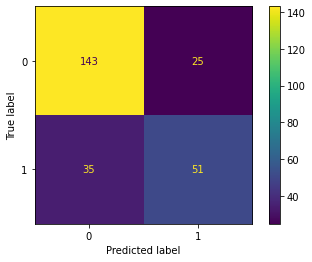

In [15]:
# Linear regressin effectiveness
plot_confusion_matrix(model_skl_1, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


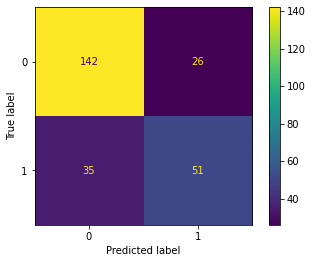

In [16]:
# Random forest effectiveness
plot_confusion_matrix(model_skl_2, X_test, y_test)

Determined that both models had near equal accuracy settled on LR

 Determine significant attributes

In [17]:
# Evaluate the significance of each predictor
X_train_sm = pd.concat([X_train,y_train],axis=1) #put in format needed for statsmodels package

formula = "Outcome~Pregnancies+Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age_20s+Age_30s+Age_40s+Age_50s+Age_60s+Age_70s+Age_80s"
model_sm_1 = smf.glm(formula=formula, data=X_train_sm, family=sm.families.Binomial()).fit()
print(model_sm_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Outcome   No. Observations:                  514
Model:                            GLM   Df Residuals:                      500
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -229.39
Date:                Tue, 27 Sep 2022   Deviance:                       458.78
Time:                        02:38:26   Pearson chi2:                     561.
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

P values for Glucose and BMI identified them as the strongest

In [18]:
# Evaluate Glucose and BMI as most significant attributes
formula = "Outcome~Glucose+BMI"
model_sm_2 = smf.glm(formula=formula, data=X_train_sm, family=sm.families.Binomial()).fit()
print(model_sm_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Outcome   No. Observations:                  514
Model:                            GLM   Df Residuals:                      511
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -249.03
Date:                Tue, 27 Sep 2022   Deviance:                       498.06
Time:                        02:38:26   Pearson chi2:                     682.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3929      0.798    -10.517      0.0

 Finalize data & model with the two significant attributes (Glucose & BMI)

In [19]:
#make final data and re-split
X_final = df.iloc[:, [1,5]]
y_final = df.Outcome
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

#train the final model
model_final = LogisticRegression(max_iter=1000).fit(X_train_final, y_train_final)

#apply model to test set
y_pred_final = model_final.predict(X_test_final)
accuracy_score(y_test_final,y_pred_final)

0.7519685039370079

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


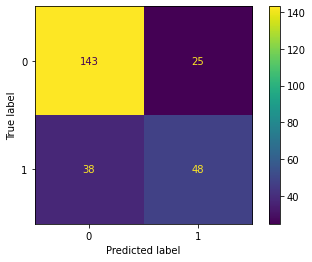

In [20]:
# Compare accuracy of focused attributes
conf_mat = plot_confusion_matrix(model_final, X_test_final, y_test_final)

 Build an interactive dashboard!

In [21]:
# reload the dataset locally to dashboard
df = pd.read_csv('https://raw.githubusercontent.com/machochocolate/CapstoneGH/master/diabetes.csv')

# make final data and model
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.33, random_state=42)
model_final = LogisticRegression(max_iter=1000).fit(X_train_final, y_train_final)

# Final Visualization 1 - Bar plot by Age Group
bar_plot = px.bar(df_group, x = "Age_Group_Plot", y = "Pct")

# Final Visualization 2 - Pie chart of Outcome (Diabetes=yes/no)
df_group_outcome = df.groupby('Outcome', as_index=False).agg(Count=("Outcome","count"))
df_group_outcome['Outcome'] = ["Yes" if x==1 else "No" for x in df_group_outcome['Outcome'] ]
pie_chart = px.pie(df_group_outcome, values='Count', names='Outcome')


prevent_init = False
app = JupyterDash(__name__, prevent_initial_callbacks = prevent_init)

app.layout = html.Div([
    html.H1('Diabetes Dashboard'),
    

    # The initial plot
    html.H2("Age distribution"),
    dcc.Graph(
      id='barchart_output',
      figure = bar_plot
    ),

    html.H2("Diabetes breakdown"),
    dcc.Graph(
      id='piechart_output',
      figure = pie_chart
    ),

    # The inputs for the dashboard
    html.H2("User inputs"),
    html.P("(BMI, Glucose, Age)"),
    dcc.Input(
      id="bmi_input",
      type="number",
      value = 0,
      placeholder="Enter BMI"
    ),
    dcc.Input(
      id="glucose_input",
      type="number",
      value = 00,
      placeholder="Enter glucose"
    ),
    dcc.Input(
        id = "age_input",
        type = "number",
        value = 0,
        placeholder = "Enter age"
    ),
    html.Button('Submit', id='update_data'),


    # The prediction from the model
    html.Br(),
    html.Div(id = "pred_output"),

    # Scatterplot of where user falls
    html.H2("Diabetes Prediction scatterplot"),
    dcc.Graph(
      id='scatterplot_output',
      figure = {}
    )

], className="container")


# Returning the prediction
@app.callback(
    Output(component_id='pred_output', component_property='children'),
    inputs = [ Input(component_id="update_data", component_property="n_clicks") ],
    state = [ State('glucose_input', 'value'), State('bmi_input', 'value')]
)
def return_pred(n_clicks, glucose, bmi):
    df_in = pd.DataFrame(list(zip( [glucose], [bmi] )), columns = ['Glucose','BMI'])
    prob = round(round(model_final.predict_proba(df_in)[0,1],3)*100,1)
    return "{}% chance of diabetes ".format(prob)


# Final Visualization 3 - Scatterplot of dataset + entered user
@app.callback(
    Output(component_id='scatterplot_output', component_property='figure'),
    inputs = [ Input(component_id="update_data", component_property="n_clicks") ],
    state = [ State('glucose_input', 'value'), State('bmi_input', 'value')]
)
def return_scatterplot(n_clicks, glucose, bmi):
    
    # Final data - add a column for the prediction / prediction color
    X_test_final["Prediction"] = ["Yes" if pred==1 else 'No' for pred in y_pred_final]

    # Make a new point to add
    df_in = pd.DataFrame(list(zip( [glucose], [bmi], ["You"] )), columns = ['Glucose','BMI','Prediction'])

    # Make final data
    df_plot = pd.concat([X_test_final, df_in], axis=0)

    # Make the plot
    fig = px.scatter(df_plot, x="Glucose", y="BMI", color="Prediction")
    fig.update_layout(clickmode='event+select')
    fig.update_traces(marker_size=20)
    return fig



# Launch Visual Dashboard

In [22]:
# Load Dashboard in cell
app.run_server(mode='inline',host="0.0.0.0",port=1005)
#app.run_server(mode='external', port = 8050) # Generate link to view dashboard


<IPython.core.display.Javascript object>